In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from data import *
from find_targets import *
from debug_tools import *

In [18]:
path = "../ModulePictures/P1004_20UPGM23211223_AfterBonding_NOK.jpg"

In [19]:
targets = find_targets_wired(path)
targets

array([[1103,  225],
       [1113, 5219],
       [1237, 2684],
       [1237, 2778],
       [5974,  218],
       [5972, 5213],
       [5844, 2677],
       [5845, 2771]], dtype=int32)

In [20]:
def find_ROI(targets, margins=(350, 250, 450, 100)):
    # Find the bounding box of the targets

    #Left side
    if targets[0] is not None: # Top left target
        xmin_left = targets[0,0] - margins[0]
        xmax_left = targets[0,0] + margins[1]

    if targets[1] is not None: # Bottom left target
        xmin_left = targets[1,0] - margins[0]
        xmax_left = targets[1,0] + margins[1]

    elif targets[2] is not None: #High left middle target
        xmin_left = targets[2,0] - margins[2]
        xmax_left = targets[2,0] + margins[3]

    elif targets[3] is not None: #Low left middle target
        xmin_left = targets[3,0] - margins[2]
        xmax_left = targets[3,0] + margins[3]
    
    else:
        raise ValueError("Not enough left targets found") #Improbable qu'on arrive ici, ça posera d'autres problèmes bien avant.
    

    # Right side
    if targets[4] is not None: # Top right target
        xmin_right = targets[4,0] + margins[0]
        xmax_right = targets[4,0] - margins[1]

    if targets[5] is not None: # Bottom right target
        xmin_right = targets[5,0] + margins[0]
        xmax_right = targets[5,0] - margins[1]

    elif targets[6] is not None: #High right middle target
        xmin_right = targets[6,0] + margins[2]
        xmax_right = targets[6,0] - margins[3] 

    elif targets[7] is not None: #Low right middle target
        xmin_right = targets[7,0] + margins[2]
        xmax_right = targets[7,0] - margins[3]
    
    else:
        raise ValueError("Not enough right targets found")
    

    return (xmin_left, xmax_left), (xmin_right, xmax_right)

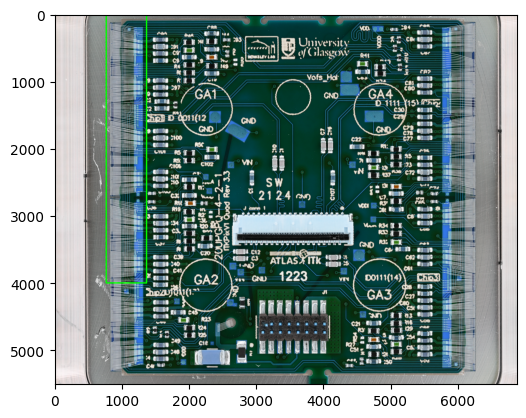

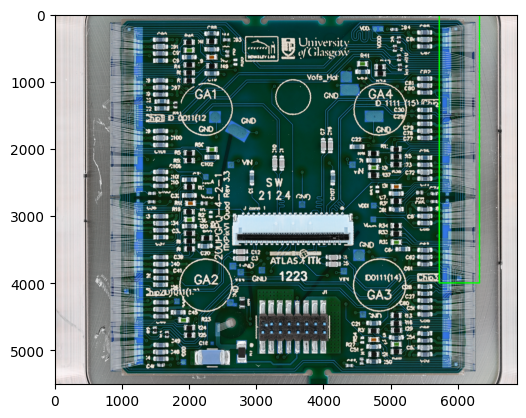

In [21]:
(xmin_left, xmax_left), (xmin_right, xmax_right) = find_ROI(targets)
draw_area(cv.imread(path), (xmin_left, 0), (xmax_left, 4000))
draw_area(cv.imread(path), (xmin_right, 0), (xmax_right, 4000))

In [25]:
magnifying_glass_ref(path)

--- Magnifying Tool Instructions ---
Drag and drop to enhance | Press 'r' to reset view | Press 'q' to finish viewing
Reference point added: (2943, 1897)
Reference point added: (165, 62)
Reference point added: (38, 74)
Reference point added: (89, 88)
Reference point added: (164, 102)
Reference point added: (20, 102)
Removed last point: (1163, 288)
Removed last point: (1307, 288)
Removed last point: (1232, 274)
Removed last point: (1181, 260)


[[(2943, 1897), (1308, 248)]]